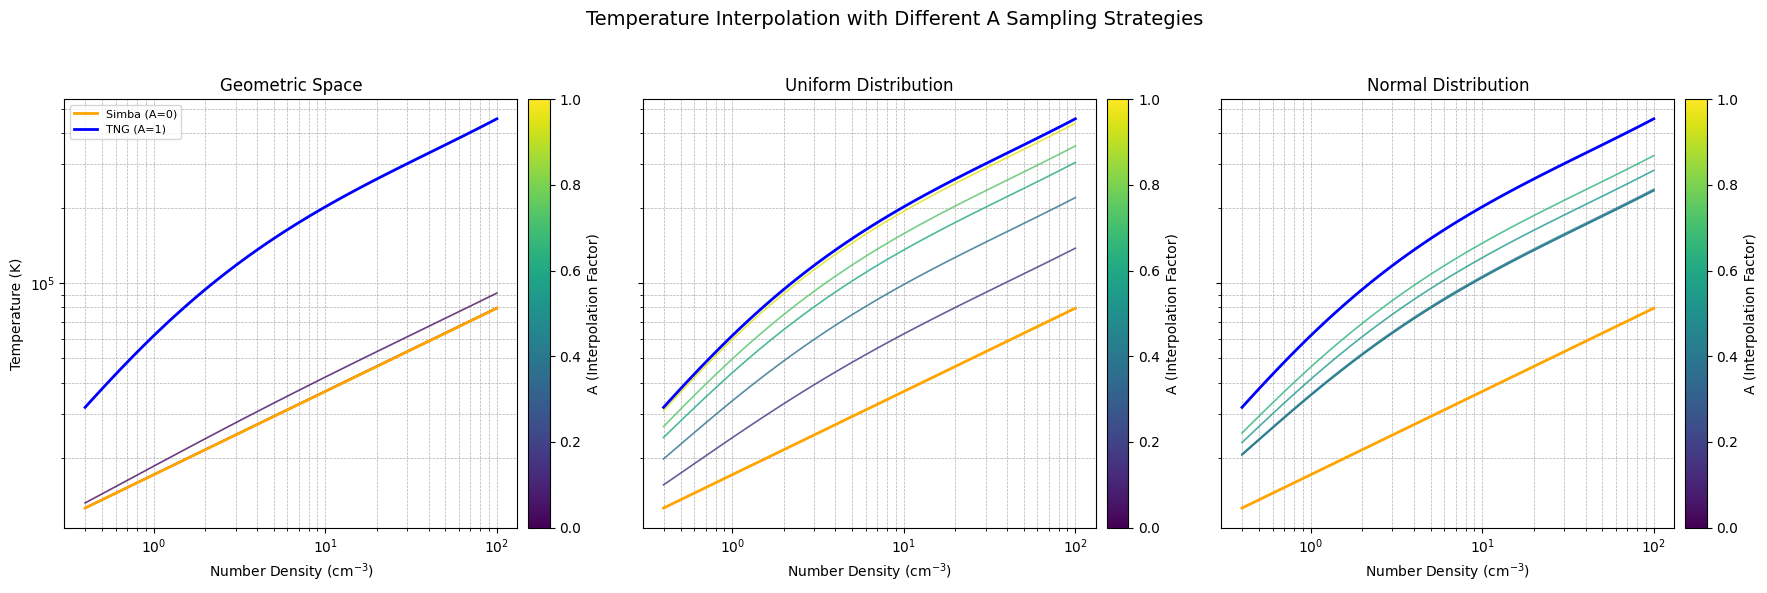

Geom:
[1.00000000e-06 3.16227766e-05 1.00000000e-03 3.16227766e-02
 1.00000000e+00]
-------------
Normal:
[0.54185619 0.65157729 0.41286828 0.42122453 0.41429298]
-------------
Uniform:
[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import astropy.units as u
import astropy.constants as c

# EOS Functions
def eos_sh03_robertsonfit(n_h, threshold=0.08):
    p_eff = np.ones_like(n_h)
    mask = n_h > threshold
    log_nh = np.log10(n_h[mask])
    p_eff[mask] = (
        0.050 * log_nh**3 - 0.246 * log_nh**2 + 1.749 * log_nh - 10.6
    )
    p_eff[~mask] = np.log10(n_h[~mask]) + np.log10(1.38065e-12)
    return 10 ** p_eff

def iso_eos(n_h):
    return 1.38065e-12 * n_h

def eos_tng(n_h, qeos=0.3):
    return (1 - qeos) * iso_eos(n_h) + qeos * eos_sh03_robertsonfit(n_h)

#constants
np.random.seed(42)
mu = 0.5
mg = 1e10 * u.Msun
T_0 = 1e4 * u.K
n_H = np.logspace(-0.4, 2, 100)
nth = 0.2

T_simba = T_0.value * (n_H / nth)**(1/3)
T_tng = eos_tng(n_H) / (n_H * c.k_B.cgs.value)

# Sampling
geom_samples = np.geomspace(1e-6, 1, 5)
uniform_samples = np.random.uniform(0, 1, size=5)


normal_samples = []

while len(normal_samples) < 5:
    samples = np.random.normal(loc=0.5, scale=0.15, size=5)
    filtered = samples[(samples >= 0) & (samples <= 1)]
    normal_samples.extend(filtered.tolist())  

normal_samples = np.array(normal_samples[:5])


fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=0, vmax=1)

# Geometric
for A in geom_samples:
    T_interp = A * T_tng + (1 - A) * T_simba
    color = cmap(A)
    axes[0].plot(n_H, T_interp, color=color, lw=1.2, alpha=0.8)

axes[0].plot(n_H, T_simba, color='orange', label='Simba (A=0)', lw=2)
axes[0].plot(n_H, T_tng, color='blue', label='TNG (A=1)', lw=2)
sm0 = cm.ScalarMappable(cmap=cmap, norm=norm)
sm0.set_array([])
cbar0 = plt.colorbar(sm0, ax=axes[0], orientation='vertical', pad=0.02)
cbar0.set_label("A (Interpolation Factor)")
axes[0].set_title("Geometric Space")

# Uniform
for A in uniform_samples:
    T_interp = A * T_tng + (1 - A) * T_simba
    color = cmap(A)
    axes[1].plot(n_H, T_interp, color=color, lw=1.2, alpha=0.8)

axes[1].plot(n_H, T_simba, color='orange', lw=2)
axes[1].plot(n_H, T_tng, color='blue', lw=2)
sm1 = cm.ScalarMappable(cmap=cmap, norm=norm)
sm1.set_array([])
cbar1 = plt.colorbar(sm1, ax=axes[1], orientation='vertical', pad=0.02)
cbar1.set_label("A (Interpolation Factor)")
axes[1].set_title("Uniform Distribution")

# Normal
for A in normal_samples:
    T_interp = A * T_tng + (1 - A) * T_simba
    color = cmap(A)
    axes[2].plot(n_H, T_interp, color=color, lw=1.2, alpha=0.8)

axes[2].plot(n_H, T_simba, color='orange', lw=2)
axes[2].plot(n_H, T_tng, color='blue', lw=2)
sm2 = cm.ScalarMappable(cmap=cmap, norm=norm)
sm2.set_array([])
cbar2 = plt.colorbar(sm2, ax=axes[2], orientation='vertical', pad=0.02)
cbar2.set_label("A (Interpolation Factor)")
axes[2].set_title("Normal Distribution")

for ax in axes:
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("Number Density (cm$^{-3}$)")
    ax.grid(True, which="both", ls="--", lw=0.5)

axes[0].set_ylabel("Temperature (K)")
axes[0].legend(fontsize=8, loc='upper left', bbox_to_anchor=(0, 1), frameon=True)

plt.suptitle("Linear Interpolation", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



print("Geom:")
print(geom_samples)

print("-------------")


print("Normal:")
print(normal_samples)

print("-------------")

print("Uniform:")
print(uniform_samples)

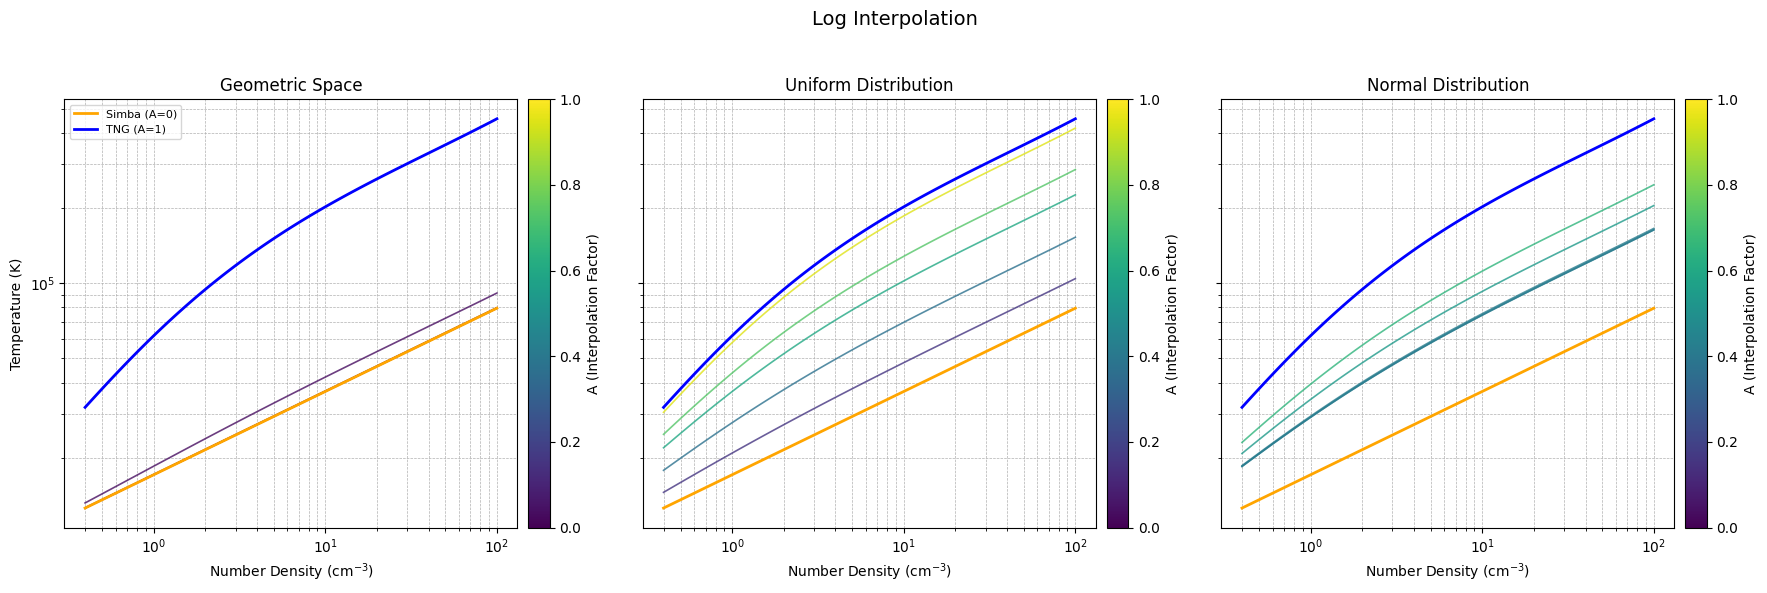

Geom:
[1.00000000e-06 3.16227766e-05 1.00000000e-03 3.16227766e-02
 1.00000000e+00]
-------------
Normal:
[0.54185619 0.65157729 0.41286828 0.42122453 0.41429298]
-------------
Uniform:
[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import astropy.units as u
import astropy.constants as c

# EOS Functions
def eos_sh03_robertsonfit(n_h, threshold=0.08):
    p_eff = np.ones_like(n_h)
    mask = n_h > threshold
    log_nh = np.log10(n_h[mask])
    p_eff[mask] = (
        0.050 * log_nh**3 - 0.246 * log_nh**2 + 1.749 * log_nh - 10.6
    )
    p_eff[~mask] = np.log10(n_h[~mask]) + np.log10(1.38065e-12)
    return 10 ** p_eff

def iso_eos(n_h):
    return 1.38065e-12 * n_h

def eos_tng(n_h, qeos=0.3):
    return (1 - qeos) * iso_eos(n_h) + qeos * eos_sh03_robertsonfit(n_h)

#constants
np.random.seed(42)
mu = 0.5
mg = 1e10 * u.Msun
T_0 = 1e4 * u.K
n_H = np.logspace(-0.4, 2, 100)
nth = 0.2

T_simba = T_0.value * (n_H / nth)**(1/3)
T_tng = eos_tng(n_H) / (n_H * c.k_B.cgs.value)

# Sampling
geom_samples = np.geomspace(1e-6, 1, 5)
uniform_samples = np.random.uniform(0, 1, size=5)


normal_samples = []

while len(normal_samples) < 5:
    samples = np.random.normal(loc=0.5, scale=0.15, size=5)
    filtered = samples[(samples >= 0) & (samples <= 1)]
    normal_samples.extend(filtered.tolist())  

normal_samples = np.array(normal_samples[:5])


fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=0, vmax=1)

# Geometric
for A in geom_samples:
    log_T_interp = A * np.log10(T_tng) + (1 - A) * np.log10(T_simba)
    T_interp = 10 ** log_T_interp   

    T_interp = A * T_tng + (1 - A) * T_simba
    color = cmap(A)
    axes[0].plot(n_H, T_interp, color=color, lw=1.2, alpha=0.8)

axes[0].plot(n_H, T_simba, color='orange', label='Simba (A=0)', lw=2)
axes[0].plot(n_H, T_tng, color='blue', label='TNG (A=1)', lw=2)
sm0 = cm.ScalarMappable(cmap=cmap, norm=norm)
sm0.set_array([])
cbar0 = plt.colorbar(sm0, ax=axes[0], orientation='vertical', pad=0.02)
cbar0.set_label("A (Interpolation Factor)")
axes[0].set_title("Geometric Space")

# Uniform
for A in uniform_samples:
    log_T_interp = A * np.log10(T_tng) + (1 - A) * np.log10(T_simba)
    T_interp = 10 ** log_T_interp    
    
    color = cmap(A)
    axes[1].plot(n_H, T_interp, color=color, lw=1.2, alpha=0.8)

axes[1].plot(n_H, T_simba, color='orange', lw=2)
axes[1].plot(n_H, T_tng, color='blue', lw=2)
sm1 = cm.ScalarMappable(cmap=cmap, norm=norm)
sm1.set_array([])
cbar1 = plt.colorbar(sm1, ax=axes[1], orientation='vertical', pad=0.02)
cbar1.set_label("A (Interpolation Factor)")
axes[1].set_title("Uniform Distribution")

# Normal
for A in normal_samples:
    log_T_interp = A * np.log10(T_tng) + (1 - A) * np.log10(T_simba)
    T_interp = 10 ** log_T_interp     
    
    color = cmap(A)
    axes[2].plot(n_H, T_interp, color=color, lw=1.2, alpha=0.8)

axes[2].plot(n_H, T_simba, color='orange', lw=2)
axes[2].plot(n_H, T_tng, color='blue', lw=2)
sm2 = cm.ScalarMappable(cmap=cmap, norm=norm)
sm2.set_array([])
cbar2 = plt.colorbar(sm2, ax=axes[2], orientation='vertical', pad=0.02)
cbar2.set_label("A (Interpolation Factor)")
axes[2].set_title("Normal Distribution")

for ax in axes:
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("Number Density (cm$^{-3}$)")
    ax.grid(True, which="both", ls="--", lw=0.5)

axes[0].set_ylabel("Temperature (K)")
axes[0].legend(fontsize=8, loc='upper left', bbox_to_anchor=(0, 1), frameon=True)

plt.suptitle("Log Interpolation", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



print("Geom:")
print(geom_samples)

print("-------------")


print("Normal:")
print(normal_samples)

print("-------------")

print("Uniform:")
print(uniform_samples)